# 1. Create a list with the names called image_files

In [39]:
import os
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import neighbors

path = "/Users/roja/Downloads/images2/"
image_files = os.listdir(path)

image_files

['farm8.jpg',
 'desert8.jpg',
 '.DS_Store',
 'city2.jpg',
 'city3.jpg',
 'city1.jpg',
 'city4.jpg',
 'city5.jpg',
 'test1.jpg',
 'test3.jpg',
 'city7.jpg',
 'city6.jpg',
 'test2.jpg',
 'city8.jpg',
 'desert7.jpg',
 '.ipynb_checkpoints',
 'farm2.jpg',
 'farm3.jpg',
 'desert6.jpg',
 'desert4.jpg',
 'farm1.jpg',
 'desert5.jpg',
 'farm4.jpg',
 'desert1.jpg',
 'farm5.jpg',
 'farm7.jpg',
 'desert2.jpg',
 'desert3.jpg',
 'farm6.jpg']

## 2. Create the scatter plot in the first page

Percentage of green color in farm images is: [0.3338467930412881, 0.3145798947161084, 0.32982159222616164, 0.3302142216023482, 0.3126774452579913, 0.36200550003320575, 0.3326393074627567, 0.33155647847549335]
Percentage of blue color in farm images is: [0.33987007505544775, 0.31740954537386984, 0.30761097231014695, 0.4032948263728943, 0.3706804693524618, 0.3592237167477091, 0.2812241449923416, 0.3138749350290284]
Percentage of green color in city images is: [0.2889915365854203, 0.3288746497784961, 0.32171351112006713, 0.3520926067264411, 0.32718512631637453, 0.33655681001293364, 0.3441919206452676, 0.32732039192104917]
Percentage of blue color in city images is: [0.2647862205478914, 0.2946128831876114, 0.24749944089149414, 0.2317126103798501, 0.2156491053354232, 0.2638719030231327, 0.1374953806468185, 0.26438328280357887]
Percentage of green color in desert images is: [0.38537916213835416, 0.38947876516901914, 0.37176749098686257, 0.3853494059331435, 0.3836885427597768, 0.3782235141367

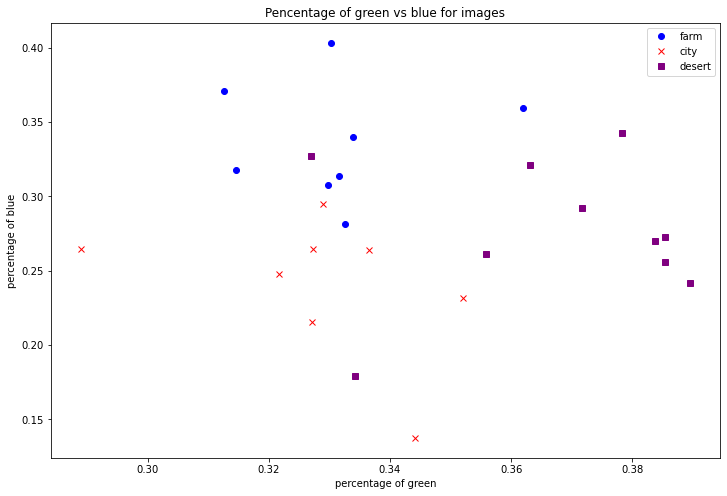

In [40]:
import os
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import neighbors

path = "/Users/roja/Downloads/images2/"

imagefiles = ['city1.jpg', 'city2.jpg', 'city3.jpg', 'city4.jpg',
'city5.jpg', 'city6.jpg', 'city7.jpg', 'city8.jpg',
'desert1.jpg', 'desert2.jpg', 'desert3.jpg', 'desert4.jpg',
'desert5.jpg', 'desert6.jpg', 'desert7.jpg', 'desert8.jpg','farm1.jpg', 'farm2.jpg', 'farm3.jpg', 'farm4.jpg',
'farm5.jpg', 'farm6.jpg', 'farm7.jpg', 'farm8.jpg','test1.jpg', 'test2.jpg', 'test3.jpg']

# pernctages of green and blue colors in each catergory of images
g_percent= []
b_percent= []

for im in imagefiles:
    img = mpimg.imread(path+im)
    rgb = np.array(img).mean(axis=(0,1))
    t = rgb[0] + rgb[1] + rgb[2]
    g_percent.append(rgb[1]/t)
    b_percent.append(rgb[2]/t)

    
f_g = g_percent[0:8]
f_b = b_percent[0:8]

print('Percentage of green color in farm images is:', f_g)
print('Percentage of blue color in farm images is:', f_b)

c_g = g_percent[8:16]
c_b = b_percent[8:16]


print('Percentage of green color in city images is:', c_g)
print('Percentage of blue color in city images is:', c_b)


d_g = g_percent[16:26]
d_b = b_percent[16:26]


print('Percentage of green color in desert images is:', d_g)
print('Percentage of blue color in desert images is:', d_b)

#scatter plot

plt.figure(figsize=(12,8))
plt.plot(f_g, f_b, 'o', color='blue', label ="farm")
plt.plot(c_g, c_b, 'x', color='red', label ="city")
plt.plot(d_g, d_b, 's', color='purple', label ="desert")

plt.title("Pencentage of green vs blue for images")
plt.xlabel("percentage of green")
plt.ylabel("percentage of blue")
plt.legend(["farm","city","desert"])


## 3. Now create an array of strings called training_target with the category of each. 

In [41]:
training_target = ['farm', 'farm', 'farm', 'farm','farm', 'farm', 'farm', 'farm',
                   'city', 'city', 'city', 'city','city', 'city', 'city', 'city',
                   'desert', 'desert', 'desert', 'desert','desert', 'desert', 'desert', 'desert'] 

## 4. Create an empty array of zeros called training_data that will eventually store the percent green and percent blue values.

In [42]:
training_data= np.zeros((24,2))

print(training_data)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## 5. Now fill the training_data array with the proper values for each image and

In [43]:
for i in range (0,len(training_data)):
    training_data[i] = [g_percent[i],b_percent[i]]
print(training_data)

[[0.33384679 0.33987008]
 [0.31457989 0.31740955]
 [0.32982159 0.30761097]
 [0.33021422 0.40329483]
 [0.31267745 0.37068047]
 [0.3620055  0.35922372]
 [0.33263931 0.28122414]
 [0.33155648 0.31387494]
 [0.28899154 0.26478622]
 [0.32887465 0.29461288]
 [0.32171351 0.24749944]
 [0.35209261 0.23171261]
 [0.32718513 0.21564911]
 [0.33655681 0.2638719 ]
 [0.34419192 0.13749538]
 [0.32732039 0.26438328]
 [0.38537916 0.27250258]
 [0.38947877 0.2416675 ]
 [0.37176749 0.2923693 ]
 [0.38534941 0.25567274]
 [0.38368854 0.26974449]
 [0.37822351 0.34243724]
 [0.35577841 0.26138973]
 [0.36318264 0.32079251]]


## 6. Create your classifier. 

In [44]:
#using KNN with n=1

knn = neighbors.KNeighborsClassifier(1,weights='distance')
knn

KNeighborsClassifier(n_neighbors=1, weights='distance')

## 7. Train your classifier.  

In [45]:
knn= knn.fit(training_data,training_target)
knn

KNeighborsClassifier(n_neighbors=1, weights='distance')

## 8. Now create an empty test_data array and fill it with the proper values for each test image and observe the filled array and consider if it matches your expectations based on your observations of the images.

In [46]:
test_data = np.zeros((3,2))

for i in range (0,len(test_data)):
    test_data[i] = [g_percent[24+i],b_percent[24+i]]
test_data

array([[0.3269592 , 0.32688513],
       [0.33429384, 0.17936789],
       [0.35004008, 0.24578861]])

## 9. Predict the class of the test images.  

In [47]:
predict = knn.predict(test_data)
print(predict)

['farm' 'city' 'city']


## 10. Print the prediction from the test images and compare with the actual images shown below. Make this comparison clear in the output of your code (e.g. prepend with ‘predicted:’ and ‘actual:’). Try to explain any errors if you note any. 

 PREDICTED - farm  ACTUAL - city


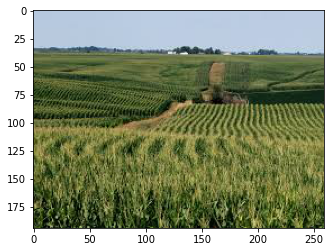

 PREDICTED - city  ACTUAL - desert


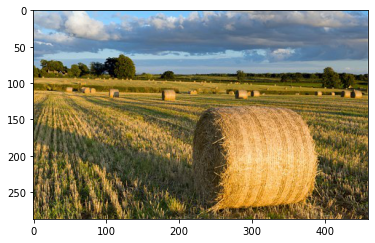

 PREDICTED - city  ACTUAL - farm


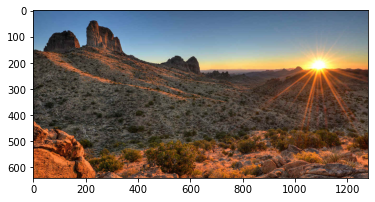

In [48]:
actual = ['city','desert','farm']
for i in range(0,3):
    print(" PREDICTED -", predict[i] , " ACTUAL -", actual[i])
    plt.imshow(mpimg.imread(path+image_files[24+i]))
    plt.show() 
    
    

In [49]:
print(len(g_percent))

27
